<a href="https://colab.research.google.com/github/Vinuthnadivi/Breast_Cancer_Detection/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np

train_images=np.random.rand(100,224,224,3)
train_labels=np.random.randint(2,size=(100,1))

test_images=np.random.rand(20,224,224,3)
test_labels=np.random.randint(2,size=(20,1))

train_labels=tf.keras.utils.to_categorical(train_labels,2)
test_labels=tf.keras.utils.to_categorical(test_labels,2)

base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
predictions=Dense(2,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable=False

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=2)
model.save('breast_cancer_demo_model.h5')
print("Breast cancer detection model has been trained on demo data.")

Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 6s/step - accuracy: 0.5370 - loss: 1.4343 - val_accuracy: 0.4500 - val_loss: 1.6369
Epoch 2/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.5144 - loss: 1.2254 - val_accuracy: 0.5500 - val_loss: 0.8125


Breast cancer detection model has been trained on demo data.


Saving Screenshot 2025-07-10 152405.png to Screenshot 2025-07-10 152405 (2).png

Preprocessing image: Screenshot 2025-07-10 152405 (2).png


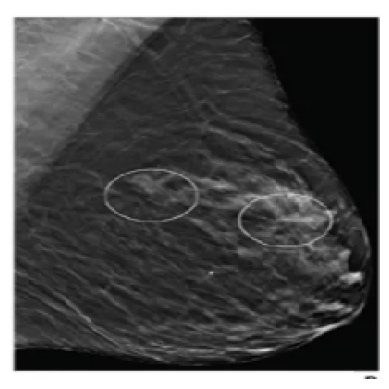

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Malignant (Breast Cancer Detected)


In [13]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

import numpy as np

from google.colab import files
import matplotlib.pyplot as plt

model=tf.keras.models.load_model('breast_cancer_demo_model.h5')

def predict_breast_cancer(image_path):
    img=image.load_img(image_path,target_size=(224,224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_array=image.img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)
    prediction=model.predict(img_array)

    if prediction[0][0]>prediction[0][1]:
        print("Prediction: Benign (No Breast Cancer)")
    else:
        print("Prediction: Malignant (Breast Cancer Detected)")
uploaded=files.upload()
for fn in uploaded.keys():
  print(f"\nPreprocessing image: {fn}")
  predict_breast_cancer(fn)